# Präsenzversuch zum Laval-Rotor

Name:  Alexander Neubauer
Datum:  30.01.2024 
Gruppe: 87

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

## Erster Versuch: Prüfstand #04
Hier werden Sie die Messergebnisse des ersten Prüfstands auswerten. Die Auswertung des zweiten Prüfstands kann analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.
Bitte ergänzen Sie im Titel der Markdown-Zellen die Nummer des Prüfstands

###  Versuchsaufbau
- Bild des Prüfstands:

<img src="image/heimversuch1.jpg" width="500">

- Beschreibung des Aufbaus:


### Versuchsauswertung

In [182]:
import os
import h5py
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import importlib
import json

from functions import m_postprocessing

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1. Einlesen der Mess- und Metadaten

Beim Einlesen der Mess- und Metadaten geben wir Ihnen bereits eine Struktur vor. Es bietet sich an diese zu verwenden, ist aber nicht zwingend erforderlich.

##### 1.a) Angabe der Pfade und Dateinamen
Passen Sie die unten stehenden Pfade an, indem Sie `None` ersetzen.

In [183]:
path_measurement_folder = os.path.join(
    "measurement_data", "data_20240115_091353_lavalrotor_87_04"
)  # path to the folder with H5-file and metadata
filename = "data_20240115_091353_lavalrotor_87_04.h5"  # name of the H5-file

##### 1.b) Preparieren der Metadaten
Wenn Sie die Pfade oben korrekt definiert haben, dann müssen Sie hier nichts anpassen. Schauen Sie sich die Struktur von `setup_dict` an und die zurückgegebenen IDs `uuid_acceleration` und `uuid_motor_rpm`.

In [184]:
setup_dict = m_postprocessing.evaluate_measurement_metadata(path_measurement_folder)

uuid_acceleration, uuid_motor_rpm = m_postprocessing.extract_uuid(setup_dict)

##### 1.c) Initialisieren der Datenstrukturen für die Messdaten
Hier wird der Vektor `interpolation_points` mit Stützstellen für die Interplation der Messdaten für alle Drehzahlen erzeugt. Dieses vereinfacht später die Darstellung des Campbell-Diagramms enorm.

Initialisieren Sie Datenstrukturen um alle nötigen Daten für das Campbell-Diragramm abspeichern zu können, verwenden Sie dazu ggf. `interpolation_points`.

In [185]:


measurement_time_in_s = 10
number_interpolation_points = 2000

interpolation_points = np.linspace(measurement_time_in_s/number_interpolation_points, measurement_time_in_s, number_interpolation_points, endpoint=True)

In [186]:
f = h5py.File("measurement_data/"+"data_20240115_091353_lavalrotor_87_04/"+"data_20240115_091353_lavalrotor_87_04.h5")

acc_x=[]
acc_y=[]
acc_z=[]

time=[]
rpm= []

for i in range(len(f.keys())):
    acc_x.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["acceleration_x"]))
    acc_y.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["acceleration_y"]))
    acc_z.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["acceleration_z"]))

    time.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["timestamp"]))
    rpm.append(np.array(f[str(i)]["RawData"][uuid_motor_rpm]["motor_rpm"]).item())
print(rpm)

[96, 207, 316, 427, 531, 642, 754, 857, 962, 1076, 1185, 1278, 1385, 1488, 1602, 1714, 1827, 1927, 2035, 2147]


#### 2. Verarbeitung der Messdaten

Verarbeiten Sie die Messdaten für alle untersuchten Drehzahlen mit `m_postprocessing.get_vec_accel()`, `m_postprocessing.interpolation()` und `m_postprocessing.my_fft_scaled()`.

In [187]:
importlib.reload(m_postprocessing)  # reload functions
accel_raw = []
accel_inter =[]
fft_data = []
amp =[]
for i in range(len(f.keys())):
    accel_raw.append(m_postprocessing.get_vec_accel(acc_x[i],acc_y[i],acc_z[i]))
    accel_inter.append(m_postprocessing.interpolation(time[i],accel_raw[i],interpolation_points))
    fft_data.append(m_postprocessing.my_fft_scaled(accel_inter[i],interpolation_points))
    amp.append(fft_data[i][0])


#### 3. Darstellung mittels Campbell-Diagramm

Erzeugen Sie hier ein Campbell-Diagramm aus den Messdaten.

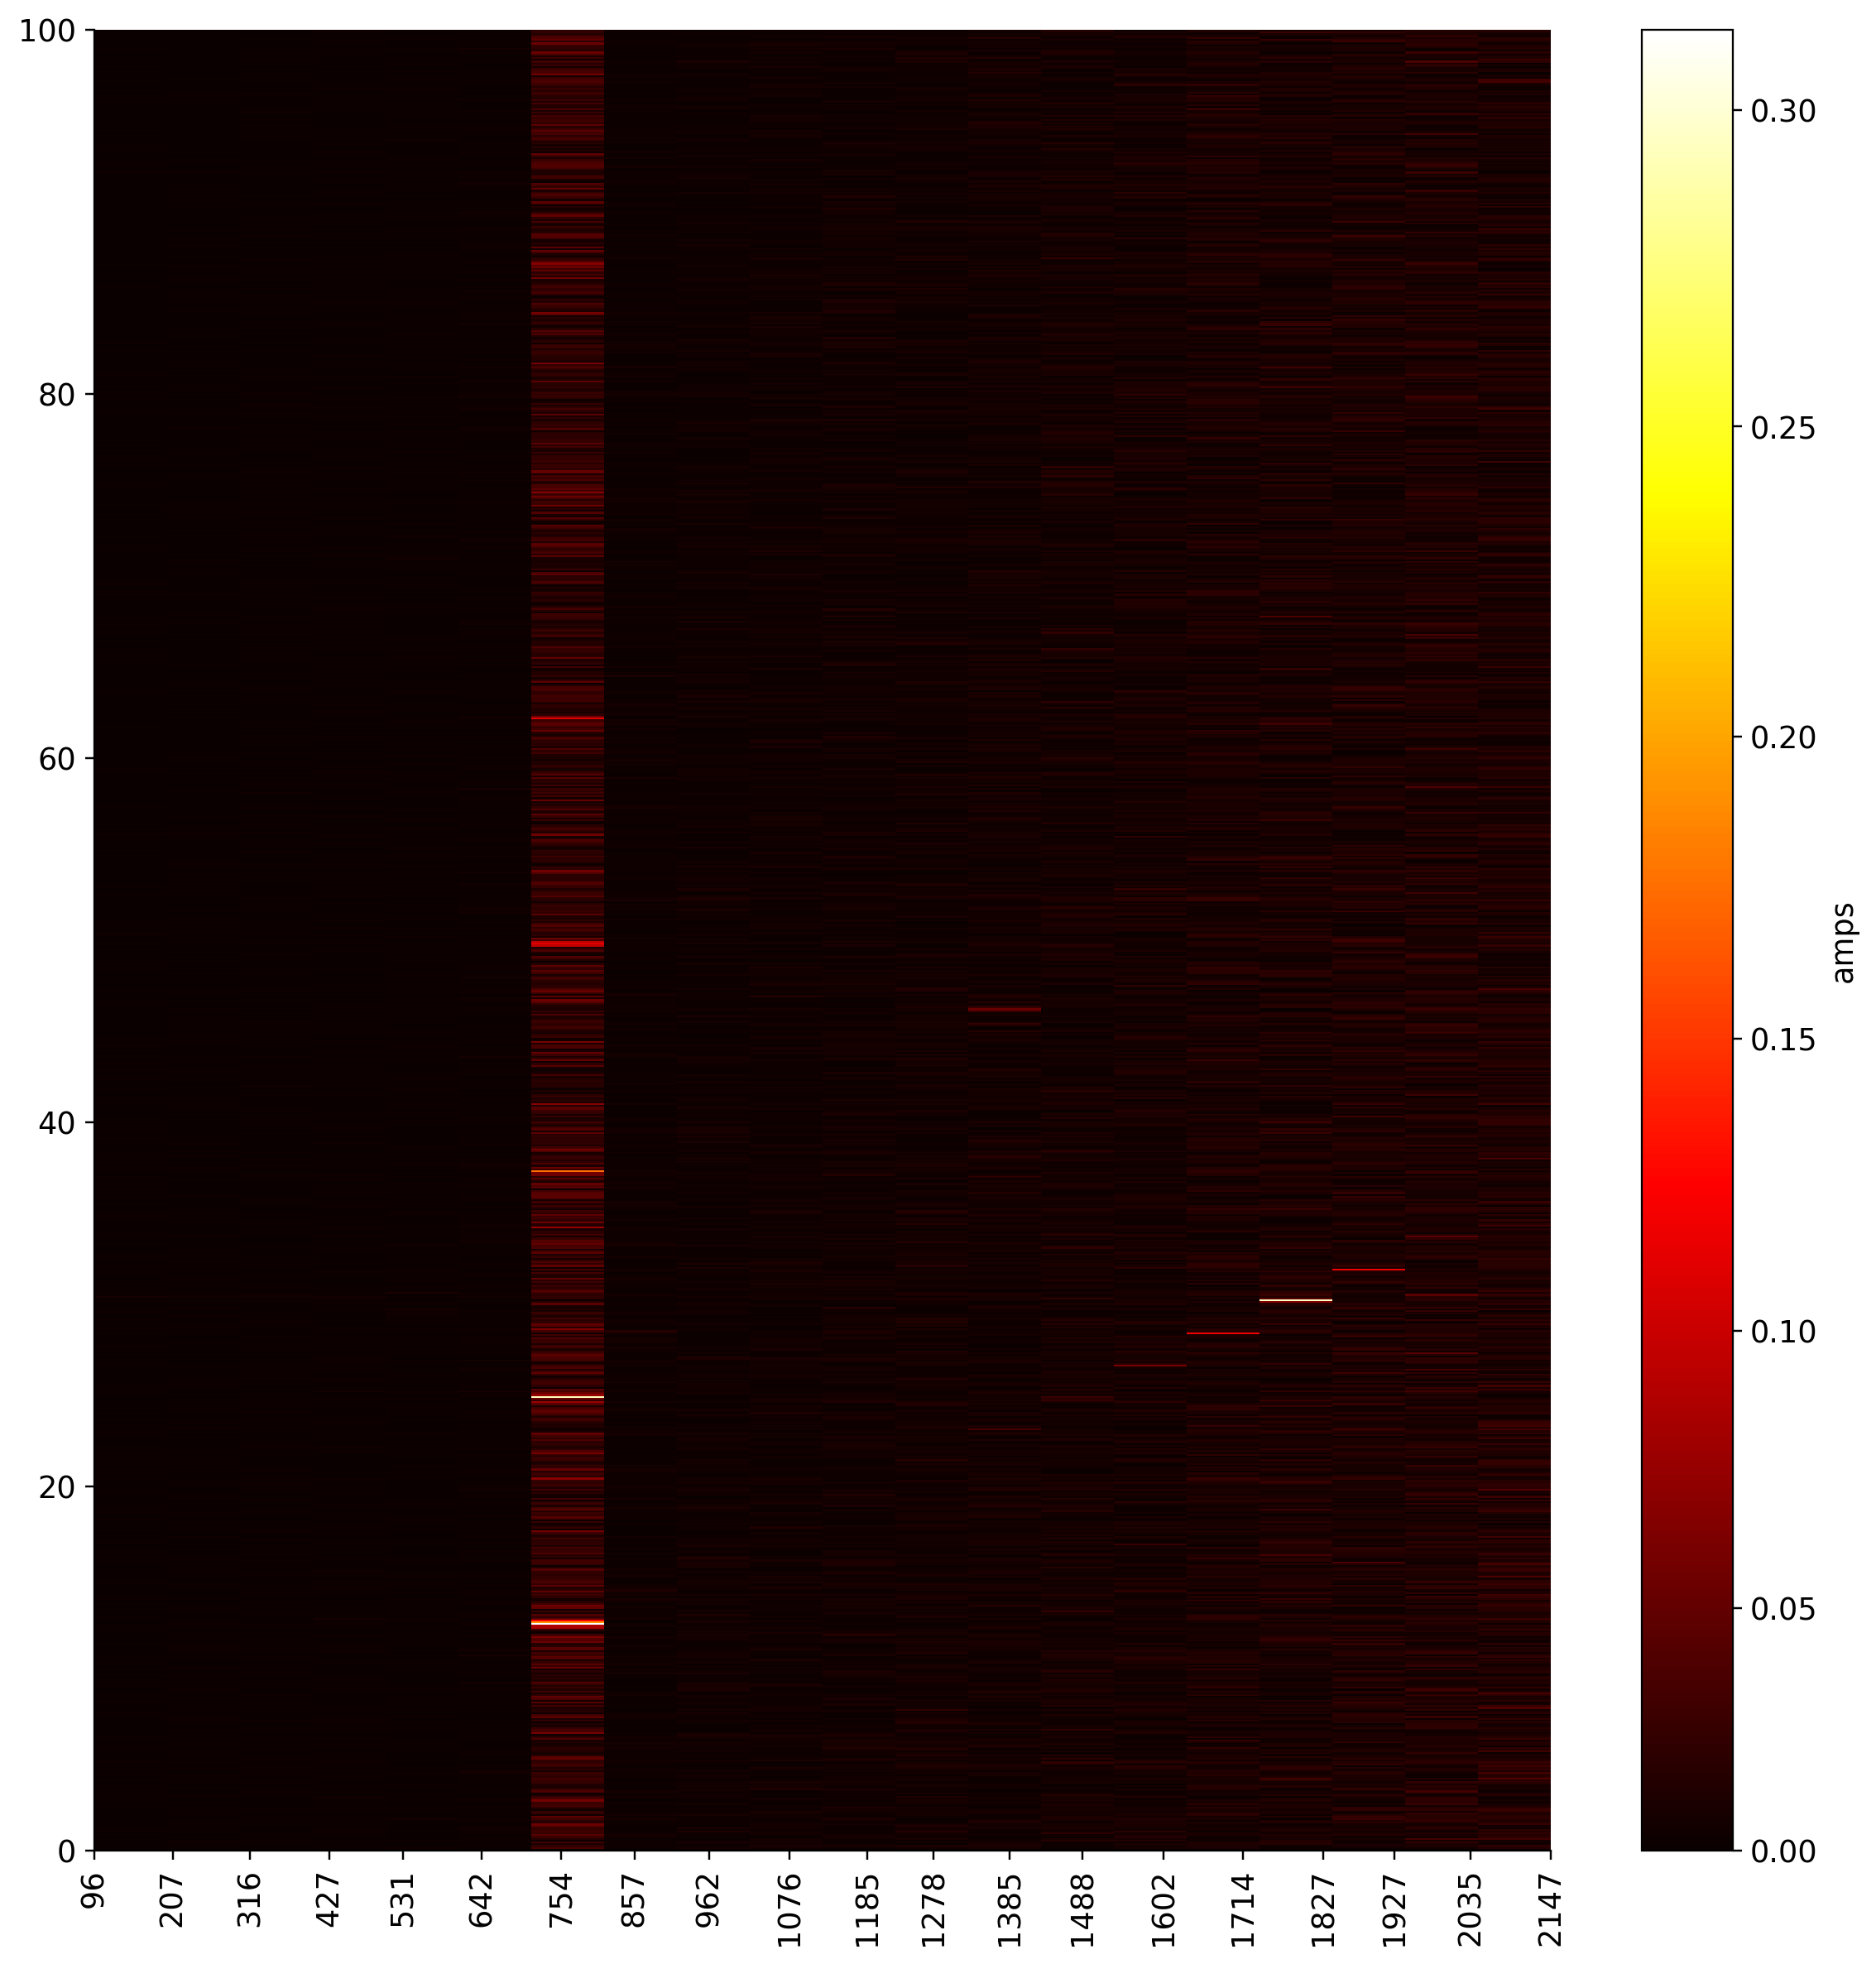

In [188]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes((0,0,2,2))
ax.set_xticks(rpm,rpm)
ax.tick_params(axis= "x", labelrotation = 90)

c = plt.imshow(np.transpose(amp), extent=[min(rpm),max(rpm),min(fft_data[0][1]),max(fft_data[0][1])], aspect= "auto", interpolation= "none"
                              , cmap='hot', norm = colors.PowerNorm(gamma=1.1), origin="lower")
plt.colorbar(c,label='amps')
plt.show()


## Zweiter Datensatz: Prüfstand #02

#### 1. Einlesen der Mess- und Metadaten

In [189]:
path_measurement_folder = os.path.join(
    "measurement_data", "data_20240102_100928_lavalrotor_01_02"
)  # path to the folder with H5-file and metadata
filename = "data_20240102_100928_lavalrotor_01_02.h5"  # name of the H5-file

setup_dict = m_postprocessing.evaluate_measurement_metadata(path_measurement_folder)

uuid_acceleration, uuid_motor_rpm = m_postprocessing.extract_uuid(setup_dict)



f = h5py.File("measurement_data/"+"data_20240102_100928_lavalrotor_01_02/"+"data_20240102_100928_lavalrotor_01_02.h5")

acc_x=[]
acc_y=[]
acc_z=[]

time=[]
rpm= []

for i in range(len(f.keys())):
    acc_x.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["acceleration_x"]))
    acc_y.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["acceleration_y"]))
    acc_z.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["acceleration_z"]))

    time.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["timestamp"]))
    rpm.append(np.array(f[str(i)]["RawData"][uuid_motor_rpm]["motor_rpm"]).item())

#### 2. Verarbeitung der Messdaten

In [190]:
importlib.reload(m_postprocessing)  # reload functions
accel_raw = []
accel_inter =[]
fft_data = []
amp =[]
for i in range(len(f.keys())):
    accel_raw.append(m_postprocessing.get_vec_accel(acc_x[i],acc_y[i],acc_z[i]))
    accel_inter.append(m_postprocessing.interpolation(time[i],accel_raw[i],interpolation_points))
    fft_data.append(m_postprocessing.my_fft_scaled(accel_inter[i],interpolation_points))
    amp.append(fft_data[i][0])

#### 3. Darstellung mittels Campbell-Diagramm

In [191]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes((0,0,2,2))
ax.set_xticks(rpm,rpm)
ax.tick_params(axis= "x", labelrotation = 90)

c = plt.imshow(np.rot90(amp), extent=[min(rpm),max(rpm),min(fft_data[0][1]),max(fft_data[0][1])], aspect= "auto", interpolation= "none"
                              , cmap='hot', norm = colors.PowerNorm(gamma=1.5))

plt.colorbar(c,label='amps')
plt.show()

## Dritter Datensatz: Prüfstand #03

#### 1. Einlesen der Mess- und Metadaten

In [192]:
path_measurement_folder = os.path.join(
    "measurement_data", "data_20240102_112539_lavalrotor_01_03"
)  # path to the folder with H5-file and metadata
filename = "data_20240102_112539_lavalrotor_01_03.h5"  # name of the H5-file

setup_dict = m_postprocessing.evaluate_measurement_metadata(path_measurement_folder)

uuid_acceleration, uuid_motor_rpm = m_postprocessing.extract_uuid(setup_dict)



f = h5py.File("measurement_data/"+"data_20240102_112539_lavalrotor_01_03/"+"data_20240102_112539_lavalrotor_01_03.h5")

acc_x=[]
acc_y=[]
acc_z=[]

time=[]
rpm= []

for i in range(len(f.keys())):
    acc_x.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["acceleration_x"]))
    acc_y.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["acceleration_y"]))
    acc_z.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["acceleration_z"]))

    time.append(np.array(f[str(i)]["RawData"][uuid_acceleration]["timestamp"]))
    rpm.append(np.array(f[str(i)]["RawData"][uuid_motor_rpm]["motor_rpm"]).item())

#### 2. Verarbeitung der Messdaten

In [193]:
importlib.reload(m_postprocessing)  # reload functions
accel_raw = []
accel_inter =[]
fft_data = []
amp =[]
for i in range(len(f.keys())):
    accel_raw.append(m_postprocessing.get_vec_accel(acc_x[i],acc_y[i],acc_z[i]))
    accel_inter.append(m_postprocessing.interpolation(time[i],accel_raw[i],interpolation_points))
    fft_data.append(m_postprocessing.my_fft_scaled(accel_inter[i],interpolation_points))
    amp.append(fft_data[i][0])

#### 3. Darstellung mittels Campbell-Diagramm

In [194]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes((0,0,2,2))
ax.set_xticks(rpm,rpm)
ax.tick_params(axis= "x", labelrotation = 90)

c = plt.imshow(np.rot90(amp), extent=[min(rpm),max(rpm),min(fft_data[0][1]),max(fft_data[0][1])], aspect= "auto", interpolation= "none"
                              , cmap='hot', norm = colors.PowerNorm(gamma=1.0))

plt.colorbar(c,label='amps')
plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Wie zu erwarten, können in allen Campdell Diagrammen ausgebildete Linien ausgemacht werden.
Beim erstem Versuch, Prüfstand 4, ist neben der Linie noch eine Amplitudenmaximum in fast allen Frequnezen bei 754 rpm zu erkennen. Die Welle wurde in diesem Messdurchgang Nahe der Eigenfrequenz angeregt und ist gegen einen Begrenzer gestoßen. Analytisch wurde die Eigenfrequenz auf 731,27 Hz bestimmt.

Im zweiten Versuch liegen die experimentell bestimmten Eigenfrequenzen bei 971 Hz und 2829 Hz.
Im dritten Versuch ist die Eingenfrequenz bei 1364 Hz auszulesen.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.